In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import warnings
pd.set_option('display.float_format', '{:.10f}'.format)
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("Employee.csv",)
#https://www.kaggle.com/datasets/tawfikelmetwally/employee-dataset

In [6]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [7]:
df.shape,df.columns

((4653, 9),
 Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
        'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
       dtype='object'))

In [8]:
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

The dataset is clean

#  Exploratory Data analysis

In [46]:
df.groupby("Education")["PaymentTier"].agg("mean")

Education
Bachelors   2.7531241322
Masters     2.4650630011
PHD         2.7318435754
Name: PaymentTier, dtype: float64

<Axes: ylabel='PaymentTier'>

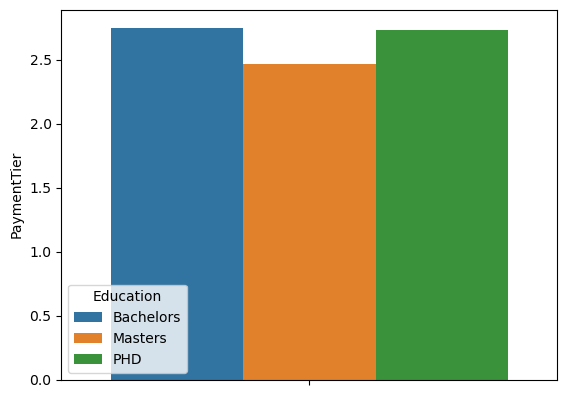

In [49]:
sns.barplot(df,y="PaymentTier",hue="Education",ci=False)

In [18]:
df.groupby("PaymentTier")["Age"].agg("mean")

PaymentTier
1   29.5925925926
2   29.1830065359
3   29.4347079038
Name: Age, dtype: float64

In [50]:
df.groupby("ExperienceInCurrentDomain")["PaymentTier"].agg("mean")

ExperienceInCurrentDomain
0   2.6732394366
1   2.7096774194
2   2.6743330267
3   2.7048346056
4   2.7099892589
5   2.7127312296
6   2.6250000000
7   2.6666666667
Name: PaymentTier, dtype: float64

<Axes: ylabel='PaymentTier'>

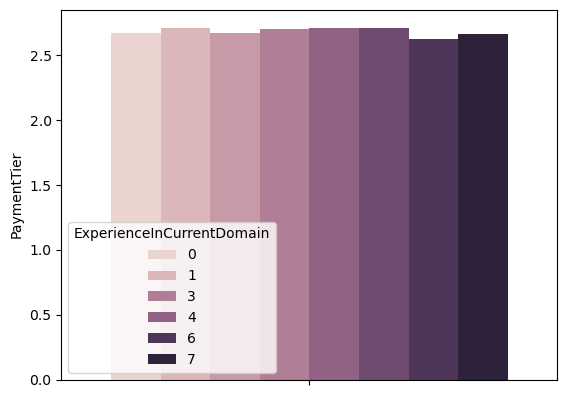

In [51]:
sns.barplot(df,y="PaymentTier",hue="ExperienceInCurrentDomain",ci=False)

In [52]:
df.groupby("JoiningYear")["PaymentTier"].mean()

JoiningYear
2012   2.8313492063
2013   2.7324364723
2014   2.7896995708
2015   2.6030729834
2016   2.8400000000
2017   2.4900722022
2018   2.9073569482
Name: PaymentTier, dtype: float64

<Axes: ylabel='PaymentTier'>

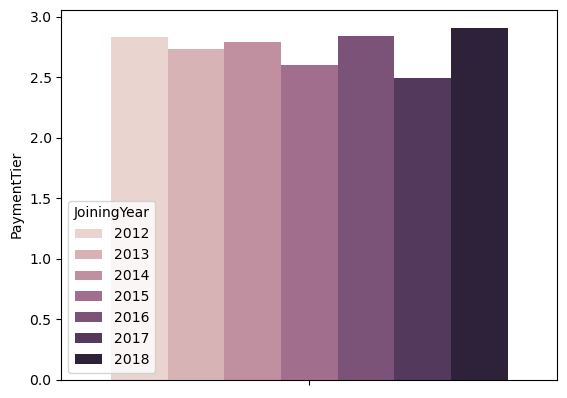

In [53]:
sns.barplot(df,y="PaymentTier",hue="JoiningYear",ci=False)

In [33]:
df.groupby("City")["PaymentTier"].mean()

City
Bangalore   2.8702872531
New Delhi   2.5980985307
Pune        2.4873817035
Name: PaymentTier, dtype: float64

 So far the payment tier seems to be independent in respects to the various employee's characteristics except the city that the employee is working in. Another intresting fact is that employees with Bachelor's Degrees or Phds seem to earn more than employees who have a master's degree

In [58]:
df.groupby("Education")["LeaveOrNot"].mean()

Education
Bachelors   0.3135240211
Masters     0.4879725086
PHD         0.2513966480
Name: LeaveOrNot, dtype: float64

Employees that left the company hold a master's degree. This  validates our previous finding that employee's with master's degree were on average paid less than other employees. We expect  pay to affect the decision of an employee leaving or staying in the firm

In [60]:
df.groupby("PaymentTier")["LeaveOrNot"].mean()

PaymentTier
1   0.3662551440
2   0.5991285403
3   0.2752004582
Name: LeaveOrNot, dtype: float64

It is intresting to note that employees who left were in the middle payment tier and not at the lowest tier. This might indicate that the reason they left was that they didn't get a raise on their salary. This is based on the assumption that employees on the second tier have a better skillset than employees on the first tier. It might be the case that they didn't believe they were getting paid enough according to their skillset

In [62]:
df.groupby("LeaveOrNot")["Age"].mean()

LeaveOrNot
0   29.5718964953
1   29.0525000000
Name: Age, dtype: float64

In [64]:
df.groupby("LeaveOrNot")["ExperienceInCurrentDomain"].mean()


LeaveOrNot
0   2.9400589584
1   2.8400000000
Name: ExperienceInCurrentDomain, dtype: float64

In [71]:
df.groupby("JoiningYear")["LeaveOrNot"].mean()

JoiningYear
2012   0.2162698413
2013   0.3348281016
2014   0.2474964235
2015   0.4071702945
2016   0.2228571429
2017   0.2680505415
2018   0.9863760218
Name: LeaveOrNot, dtype: float64

Most employees that left joined the company in 2018 

In [72]:
df.groupby("City")["LeaveOrNot"].mean()

City
Bangalore   0.2670556553
New Delhi   0.3163353500
Pune        0.5039432177
Name: LeaveOrNot, dtype: float64

Most employees that left were working in the City of Pune

# Predictive analysis

In [182]:
# Transform variables into factors
factors=["Education","JoiningYear","Gender","City","PaymentTier","EverBenched"]
df[factors]=df[factors].astype("category")

# Decision Tree

In [183]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import random

random.seed(10)

In [184]:
#Set dummies for decision tree classification
X=df.drop("LeaveOrNot",axis=1)
dummies=pd.get_dummies(X[factors])
X=pd.concat([X.drop(factors,axis=1),dummies],axis=1)

In [185]:
y=df["LeaveOrNot"]

In [187]:
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [189]:
model_decision_tree=DecisionTreeClassifier(max_depth=3,criterion="gini")

In [190]:
model_decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [191]:
y_pred =model_decision_tree.predict(X_test)

In [192]:
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.788659793814433


In [193]:
print(classification_report(y_test, y_pred,target_names=["stay","leave"]))

              precision    recall  f1-score   support

        stay       0.78      0.94      0.86       770
       leave       0.81      0.49      0.61       394

    accuracy                           0.79      1164
   macro avg       0.80      0.72      0.73      1164
weighted avg       0.79      0.79      0.77      1164



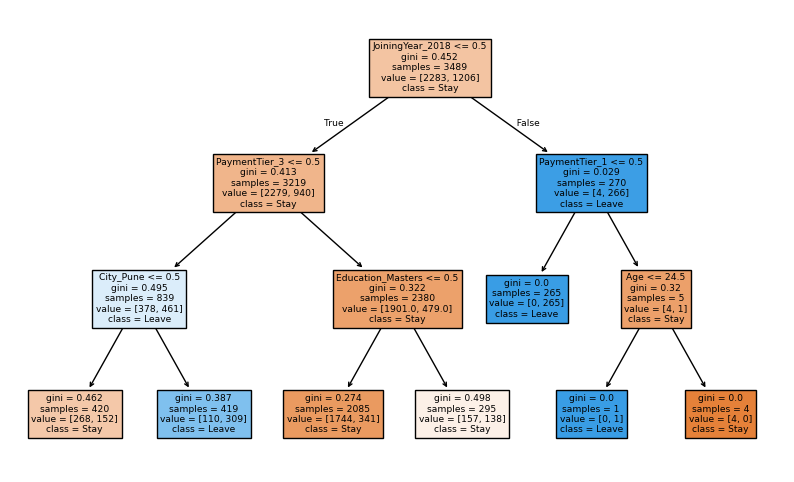

In [194]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plot_tree(model_decision_tree, feature_names=X.columns, class_names=["Stay","Leave"], filled=True)
plt.show()

Hyperparameter tuning

In [195]:
from sklearn.model_selection import GridSearchCV

In [196]:
#define hyperparameter grid
param_grid = {
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}


In [197]:
grid_search = GridSearchCV(estimator=model_decision_tree, param_grid=param_grid,
        cv=5, scoring='accuracy', n_jobs=-1)

In [198]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=3), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [199]:
#Best parameters and score 

print("Best parameters:", grid_search.best_params_)
print("Best cross-val score:", grid_search.best_score_)

Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best cross-val score: 0.8340538451735435


In [200]:
y_pred = grid_search.best_estimator_.predict(X_test)
print("Test set accuracy:", accuracy_score(y_test, y_pred))

Test set accuracy: 0.845360824742268


With hyperparameter tuning the best accuracy reached is 84.5%

# Random Forest 

In [201]:
from sklearn.ensemble import RandomForestClassifier

In [202]:
model_random_forest=RandomForestClassifier(n_estimators=100,max_depth=None)
model_random_forest.fit(X_train,y_train)

RandomForestClassifier()

In [203]:
y_pred=model_random_forest.predict(X_test)
print("Accuracy:", accuracy_score(y_test,y_pred))
print(classification_report(
    y_test,y_pred,target_names=["Stay","Leave"]
))

Accuracy: 0.8264604810996563
              precision    recall  f1-score   support

        Stay       0.87      0.87      0.87       770
       Leave       0.75      0.73      0.74       394

    accuracy                           0.83      1164
   macro avg       0.81      0.80      0.81      1164
weighted avg       0.83      0.83      0.83      1164



### Hyperparameter tuning random forest

In [204]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

In [205]:
grid_search = GridSearchCV(estimator=model_random_forest, param_grid=param_grid,
      cv=5, n_jobs=-1, scoring='accuracy')

In [206]:
grid_search.fit(X_train,y_train)
print("Best Parameters",grid_search.best_params_)

Best Parameters {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [207]:
model_random_forest=RandomForestClassifier(n_estimators=200,max_depth=10,
                                           max_features="log2",
                                           min_samples_leaf=1,
                                           min_samples_split=5)

In [208]:
model_random_forest.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_split=5,
                       n_estimators=200)

In [209]:
y_pred=model_random_forest.predict(X_test)
print("Accuracy:", accuracy_score(y_test,y_pred))
print(classification_report(
    y_test,y_pred,target_names=["Stay","Leave"]
))

Accuracy: 0.8616838487972509
              precision    recall  f1-score   support

        Stay       0.87      0.93      0.90       770
       Leave       0.85      0.72      0.78       394

    accuracy                           0.86      1164
   macro avg       0.86      0.83      0.84      1164
weighted avg       0.86      0.86      0.86      1164



### With hyperparameter tuning, random forest returns a 86% accuracy

# Knn classifier

In [210]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
#Random forest and decision trees dont require scaling, but KNN and SVM require.

X["Age"]=StandardScaler().fit_transform(X[["Age"]])

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
model_knn=KNeighborsClassifier()
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [219]:
grid = GridSearchCV(model_knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [221]:
print('Best Parameters:',grid.best_params_)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}


In [222]:
y_pred = grid.best_estimator_.predict(X_test)
print("Classification report:\n", classification_report(y_test, y_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.83      0.95      0.89       772
           1       0.86      0.61      0.72       392

    accuracy                           0.84      1164
   macro avg       0.85      0.78      0.80      1164
weighted avg       0.84      0.84      0.83      1164



With knn and hyperparameter tuning we get  84% accuracy 

# Support Vector classifier

In [223]:
from sklearn.svm import SVC

In [224]:
model_svc=SVC()

In [236]:
param_grid = {
    'C': [0.1, 1, 10,],             
    'kernel': ['linear', 'rbf'],  
    'gamma': [ 0.01, 0.1, 1] 
}

In [238]:
grid = GridSearchCV(estimator=model_svc, param_grid=param_grid, 
    cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)

Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [ ]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90       772
           1       0.88      0.67      0.76       392

    accuracy                           0.86      1164
   macro avg       0.86      0.81      0.83      1164
weighted avg       0.86      0.86      0.85      1164



 With hyperparameter tuning svm classification gives us 86% accuracy

# Overall Model Evaluation

the classification is imbalanced 

In [241]:
df["LeaveOrNot"].mean()

0.3438641736514077

If our overall goal is to retain employees then we want a high percentage of correct predictions regarding employees leaving. A high recall score in this sense would minimize our assesment of which employees will leave enabling us to to take the appropriate actions to keep the employees in our firm. We should rerun the above grid searches with the target metric as recall. 
In this project we will just check which model returned the highest recall regarding employees classified as staying. 
This model is the svm and the knn classifier

In [247]:
from sklearn.inspection import permutation_importance

model_knn=KNeighborsClassifier()
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
grid = GridSearchCV(model_knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)
best_model = grid.best_estimator_
result = permutation_importance(best_model, X_test, y_test, n_repeats=10)

In [ ]:
#Top 10 Factors

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=False)
importance_df.head(10)

,Feature,Importance
11,JoiningYear_2018,0.0534364261
3,Education_Masters,0.0271477663
2,Education_Bachelors,0.0251718213
10,JoiningYear_2017,0.0195876289
0,Age,0.0183848797
13,Gender_Male,0.0180412371
12,Gender_Female,0.0180412371
16,City_Pune,0.0158934708
19,PaymentTier_3,0.0128006873
1,ExperienceInCurrentDomain,0.0120274914
